# Process 2D Phase diagrams

In [111]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [112]:
from pathlib import Path
import numpy as np
import os
from matplotlib import pyplot as plt
import matplotlib as mpl
from time import time
from munch import Munch

from FKMC.import_funcs import get_data_funcmap, mean_over_MCMC, IPRandDOS

%matplotlib inline
np.seterr(all='warn')
textwidth = 6.268
mpl.rcParams['figure.dpi'] = 70
default_figargs = dict(figsize = (textwidth,textwidth))

import logging
mpl_logger = logging.getLogger('matplotlib')
mpl_logger.setLevel(logging.WARNING) 

#HPC_data = Path('/data/users/tch14/slurm_runs/') #CMTH
HPC_data = Path('~/HPC_data/').expanduser() #CX1

In [138]:
def TU_phase_diagram(ax, TU_data):
    plot_binder = False
    norm = mpl.colors.Normalize(vmin=0, vmax=1)
    #TU_data.hints.Mf_moments == ('Ns', 'repeats', 'Us', 'Ts', 'moment', 'MCstep')
    M2 = np.nanmean(TU_data.Mf_moments[-1, :, :, :, 2], axis = 0).T
    M4 = np.nanmean(TU_data.Mf_moments[-1, :, :, :, 4], axis = 0).T
    Y = M2**2 / M4 if plot_binder else M2
    
    pcol = ax.pcolormesh(TU_data.Us, TU_data.Ts, Y, cmap="RdBu_r", norm = norm, linewidth=0, rasterized = True)
    #pcol.set_edgecolor('face')
    ax.set(ylabel = 'T', xlabel = 'U')

In [114]:
## TJ phase data
fpath = Path('/data/users/tch14/slurm_runs/') / '117969'
fpath = Path('~/HPC_data/').expanduser() / 'TJ_phase_diagram'

logging.basicConfig()
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

TJ_phase_obs = get_data_funcmap(fpath,
                         functions = [mean_over_MCMC('Mf_moments'), IPRandDOS()],
                          structure_names = ('repeats','Js','Ts'),
                         )

INFO:FKMC.import_funcs:Logger keys: ['total_jobs', 'Js', 'Ts', 'Ns', 'repeats', 'structure_names', 'parameters', 'MCMC_params', 'logs', 'desc'] 

INFO:FKMC.import_funcs:MCMC_params keys: ['state', 'N_steps', 'N_burn_in', 'thin', 'logger', 'proposal', 'accept_function', 'warnings'] 

INFO:FKMC.import_funcs:available observables = ['A', 'Fc', 'Ff', 'IPRs', 'Mf_moments', 'N_cumulants', 'N_sites', 'N_steps', 'Nc', 'Nf', 'accept_rates', 'classical_accept_rates', 'eigenval_bins', 'eigenvals', 'last_state', 'powers', 'proposal_rates', 'return_vals', 'start', 'state', 'time', 'update']


0 

INFO:FKMC.import_funcs:
Took 11.42s to do the first 10, should take 1016.82s to do the remaining 890

INFO:FKMC.import_funcs:After 10 files, 10.6% of the time was file I/O


18 36 54 72 90 

INFO:FKMC.import_funcs:After 100 files, 12.1% of the time was file I/O


108 126 144 162 180 198 216 234 252 270 288 306 324 342 360 378 396 414 432 

INFO:FKMC.import_funcs:
Took 456.21s to do the first 450, should take 456.21s to do the remaining 450



450 468 486 504 522 540 558 576 594 612 630 648 666 684 702 720 738 756 774 792 810 828 846 864 882 

INFO:FKMC.import_funcs:########################################################################

INFO:FKMC.import_funcs:Observables has keys: dict_keys(['total_jobs', 'Js', 'Ts', 'Ns', 'repeats', 'structure_names', 'parameters', 'MCMC_params', 'desc', 'structure_dims', 'hints', 'flat', 'E_bins', 'Mf_moments', 'DOS', 'IPR', 'dDOS', 'dIPR', 'time', 'accept_rates', 'proposal_rates'])
INFO:FKMC.import_funcs:    Completed jobs: 900/900
    MCMC Steps: 100000 with thinning = 100 for 1000 recorded steps
    Burn in: 10000
    Structure_names: {'repeats': array(1), 'Js': 30, 'Ts': 30}
    Ns = [  4   8  16  32  64 128]
    Runtimes: 
        Average: 11.0 hours
        Min: 1.0 hours
        Max: 2.0 days
        Total: 63.0 weeks
    


In [116]:
import pickle 
with open(HPC_data / 'pickled_data/TJ_phase_data.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(TJ_phase_obs, f, pickle.HIGHEST_PROTOCOL)
    print('Pickling Successful')

Pickling Successful


In [32]:
del TJ_phase_obs

In [117]:
## TU phase data
fpath = Path('/data/users/tch14/slurm_runs/117734')
fpath = Path('~/HPC_data/').expanduser() / 'TU_phase_diagram'

logging.basicConfig()
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

TU_phase_obs = get_data_funcmap(fpath,
                         functions = [mean_over_MCMC('Mf_moments'), IPRandDOS(E_bins = np.linspace(-10, 10, 2000 + 1))],
                          structure_names = ('repeats','Us','Ts'),
                         )

import pickle 
with open(HPC_data / 'pickled_data/TU_phase_data.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(TU_phase_obs, f, pickle.HIGHEST_PROTOCOL)
    print('Pickling Successful')

DEBUG:FKMC.import_funcs:job ids range from 0 to 899
DEBUG:FKMC.import_funcs:structure_dims before inference = ()
DEBUG:FKMC.import_funcs:Infilling structure_dims from dimensions variables. (len(Ts) etc)
DEBUG:FKMC.import_funcs:structure_names = ('repeats', 'Us', 'Ts')
DEBUG:FKMC.import_funcs:structure_dims = (array(1), 30, 30)
DEBUG:FKMC.import_funcs:Expected number of jobs 900

INFO:FKMC.import_funcs:Logger keys: ['total_jobs', 'Us', 'Ts', 'Ns', 'repeats', 'structure_names', 'parameters', 'MCMC_params', 'logs', 'desc'] 

INFO:FKMC.import_funcs:MCMC_params keys: ['state', 'N_steps', 'N_burn_in', 'thin', 'logger', 'proposal', 'accept_function', 'warnings'] 

DEBUG:FKMC.import_funcs:MCMC Steps: 100000 with thinning = 100 for 1000 recorded steps
DEBUG:FKMC.import_funcs:[(0, 'repeats', array(1)), (1, 'Us', 30), (2, 'Ts', 30)]
INFO:FKMC.import_funcs:available observables = ['A', 'Fc', 'Ff', 'IPRs', 'Mf_moments', 'N_cumulants', 'N_sites', 'N_steps', 'Nc', 'Nf', 'accept_rates', 'classical_acc

0 

INFO:FKMC.import_funcs:
Took 9.91s to do the first 10, should take 812.43s to do the remaining 820

INFO:FKMC.import_funcs:After 10 files, 5.5% of the time was file I/O


16 32 48 64 80 96 

INFO:FKMC.import_funcs:After 100 files, 8.8% of the time was file I/O


112 128 144 160 176 192 208 224 240 256 272 288 

Exception ignored in: <function NpzFile.__del__ at 0x2af0b63924d0>
Traceback (most recent call last):
  File "/rds/general/user/tch14/home/anaconda3/lib/python3.7/site-packages/numpy/lib/npyio.py", line 230, in __del__
    self.close()
  File "/rds/general/user/tch14/home/anaconda3/lib/python3.7/site-packages/numpy/lib/npyio.py", line 221, in close
    if self.zip is not None:
AttributeError: 'NpzFile' object has no attribute 'zip'


304 320 336 352 368 384 400 

INFO:FKMC.import_funcs:
Took 426.75s to do the first 415, should take 426.75s to do the remaining 415



416 432 448 464 480 496 512 528 544 560 576 592 608 624 640 656 672 688 704 720 736 752 768 784 800 816 

INFO:FKMC.import_funcs:########################################################################

INFO:FKMC.import_funcs:Observables has keys: dict_keys(['total_jobs', 'Us', 'Ts', 'Ns', 'repeats', 'structure_names', 'parameters', 'MCMC_params', 'desc', 'structure_dims', 'hints', 'flat', 'E_bins', 'Mf_moments', 'DOS', 'IPR', 'dDOS', 'dIPR', 'time', 'accept_rates', 'proposal_rates'])
INFO:FKMC.import_funcs:    Completed jobs: 830/900
    MCMC Steps: 100000 with thinning = 100 for 1000 recorded steps
    Burn in: 10000
    Structure_names: {'repeats': array(1), 'Us': 30, 'Ts': 30}
    Ns = [  4   8  16  32  64 128]
    Runtimes: 
        Average: 8.0 hours
        Min: 1.0 hours
        Max: 1.0 days
        Total: 43.0 weeks
    


FileNotFoundError: [Errno 2] No such file or directory: '/data/users/tch14/pickled_data/TU_phase_data.pickle'

In [118]:
import pickle 
with open(HPC_data / 'pickled_data/TU_phase_data.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(TU_phase_obs, f, pickle.HIGHEST_PROTOCOL)
    print('Pickling Successful')

Pickling Successful


In [17]:
## TAlpha phase data
fpath = Path('/data/users/tch14/slurm_runs/119596')

TAlpha_phase_obs1 = get_data_funcmap(fpath,
                         functions = [mean_over_MCMC('Mf_moments'), IPRandDOS()],
                          structure_names = ('repeats','alphas','Ts'),
                         )

CRITICAL:FKMC.import_funcs:looking in /data/users/tch14/slurm_runs/119596
INFO:FKMC.import_funcs:job ids range from 0 to 899
INFO:FKMC.import_funcs:structure_names = ('repeats', 'alphas', 'Ts')
INFO:FKMC.import_funcs:structure_dims = (array(1), 30, 30)
INFO:FKMC.import_funcs:Expected number of jobs 900

INFO:FKMC.import_funcs:Logger keys: ['total_jobs', 'U', 'Ts', 'Ns', 'alphas', 'repeats', 'structure_names', 'parameters', 'MCMC_params', 'logs', 'desc'] 

INFO:FKMC.import_funcs:MCMC_params: Munch({'state': None, 'N_steps': 100000, 'N_burn_in': 10000, 'thin': 100, 'logger': <FKMC.montecarlo.Eigenspectrum_IPR_all object at 0x7f3be29eae10>, 'proposal': <function p_multi_site_uniform_reflect at 0x7f3be33d1400>, 'accept_function': <function perturbation_accept at 0x7f3be33d1730>, 'warnings': True}) 

INFO:FKMC.import_funcs:MCMC Steps: 100000 with thinning = 100 for 1000 recorded steps
INFO:FKMC.import_funcs:[(0, 'repeats', array(1)), (1, 'alphas', 30), (2, 'Ts', 30)]
INFO:FKMC.import_funcs:

In [13]:
fpath = Path('/data/users/tch14/slurm_runs/128530')

TAlpha_phase_obs2 = get_data_funcmap(fpath,
                         functions = [mean_over_MCMC('Mf_moments'), IPRandDOS()],
                          structure_names = ('repeats','alphas','Ts'),
                         )

CRITICAL:FKMC.import_funcs:looking in /data/users/tch14/slurm_runs/128530
INFO:FKMC.import_funcs:job ids range from 0 to 899
INFO:FKMC.import_funcs:structure_names = ('repeats', 'alphas', 'Ts')
INFO:FKMC.import_funcs:structure_dims = (array(1), 30, 30)
INFO:FKMC.import_funcs:Expected number of jobs 900
INFO:FKMC.import_funcs:Logger keys: ['total_jobs', 'U', 'Ts', 'Ns', 'alphas', 'repeats', 'structure_names', 'parameters', 'MCMC_params', 'logs', 'desc'] 

INFO:FKMC.import_funcs:MCMC_params: Munch({'state': None, 'N_steps': 100000, 'N_burn_in': 10000, 'thin': 100, 'logger': <FKMC.montecarlo.Eigenspectrum_IPR_all object at 0x7f3be2a37c50>, 'proposal': <function p_multi_site_uniform_reflect at 0x7f3be33d1400>, 'accept_function': <function perturbation_accept at 0x7f3be33d1730>, 'warnings': True}) 

INFO:FKMC.import_funcs:MCMC Steps: 100000 with thinning = 100 for 1000 recorded steps
INFO:FKMC.import_funcs:[(0, 'repeats', array(1)), (1, 'alphas', 30), (2, 'Ts', 30)]
INFO:FKMC.import_funcs:a

In [21]:
for name in ['Mf_moments', 'IPR', 'DOS']:
    TAlpha_phase_obs[name] = np.concatenate([TAlpha_phase_obs1[name], TAlpha_phase_obs2[name]], axis = 1)

In [22]:
TAlpha_phase_obs.Mf_moments.shape

(6, 2, 30, 30, 5)

In [23]:
TAlpha_phase_obs.hints.Mf_moments

('Ns', 'repeats', 'alphas', 'Ts', 'MCstep')

In [24]:
import pickle 
with open(f'/data/users/tch14/pickled_data/TAlpha_phase_data.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(TAlpha_phase_obs, f, pickle.HIGHEST_PROTOCOL)
    print('Pickling Successful')

Pickling Successful


In [40]:
del TAlpha_phase_obs

# Read in new TU data

In [119]:
from FKMC.import_funcs import mean_over_MCMC, IPRandDOS
TUfunctions = [
    mean_over_MCMC('Mf_moments', N_error_bins = 10),
    IPRandDOS(),
    ]

[PosixPath('/rds/general/user/tch14/home/HPC_data/TU_phase_diagram3/code/TU_simulation.py')]
Ham_params:  t=1, alpha=1.25, mu=0, beta=varying, J=5, U=varying, normalise=True,


Tasks per chain: 5,

Each doing 1000 steps,

5000 total chain length,

500 samples,


MCMC_params:  N_steps=1000, N_burn_in=1000, thin=10, proposal=<function p_multi_site_uniform_reflect at 0x2af0e1566680>, accept_function=<function perturbation_accept at 0x2af0b1a9f7a0>, warnings=False,


0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

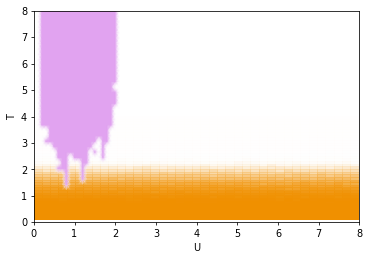

In [150]:
#%%time
import logging
import shutil
from FKMC.import_funcs import get_data_funcmap_chain_ext
logging.basicConfig()
logger = logging.getLogger()
logger.setLevel(logging.WARNING)

oTU = get_data_funcmap_chain_ext(Path('~/HPC_data/TU_phase_diagram3'),
            functions = TUfunctions,
            task_id_range = None,
            )
print(oTU.processed_task_ids)

print("Backing up the data...")
shutil.copy(Path('~/HPC_data/pickled_data/TU_finer_data.pickle').expanduser(), Path('~/HPC_data/pickled_data/TU_finer_data.pickle.backup').expanduser())


print("Saving the new data...")
with open(Path('~/HPC_data/pickled_data/TU_finer_data.pickle').expanduser(), 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    oTU.functions = None
    pickle.dump(oTU, f, pickle.HIGHEST_PROTOCOL)
    print('Pickling Successful')
    
f, axes = plt.subplots(1,1, sharey = 'all', gridspec_kw = dict(wspace = 0.1))
TU_phase_diagram(axes, oTU)

Pickling Successful


Reading in more data...


INFO:FKMC.import_funcs:########################################################################

INFO:FKMC.import_funcs:Observables has keys: dict_keys(['functions', 'flat', 'hints', 'processed_task_ids', 'task_id_range', 'this_run', 'datapath', 'codepath', 'py_script', 'batch_params', 'structure_names', 'structure_dims', 'N_tasks', 'N_chains', 'original_N_steps', 'thin', 'N_steps', 'E_bins', 'Ns', 'parameters', 'MCMC_params', 'structure_dimensions', 'chain_id', 'task_id', 'allow_pickle', 'desc', 'Rs', 'Us', 'Ts', 'Mf_moments', 'DOS', 'IPR', 'dDOS', 'dIPR', 'time', 'accept_rates', 'proposal_rates'])
INFO:FKMC.import_funcs:    Completed jobs:?
    MCMC Steps: 2 chains of 1000 for 2000 with thinning = 10 for 200 recorded steps
    Burn in: 1000
    Structure_names: {'Rs': 4, 'Us': 40, 'Ts': 40}
    Ns = [250]
    Runtimes: 
        Average: 44.0 minutes
        Min: 3.0 minutes
        Max: 8.0 hours
        Total: 4.0 weeks
    
    


Backing up the data...
Saving the new data...
Pickling Successful


/rds/general/user/tch14/home/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice
  # This is added back by InteractiveShellApp.init_path()
/rds/general/user/tch14/home/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice
  if sys.path[0] == '':
/rds/general/user/tch14/home/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in greater


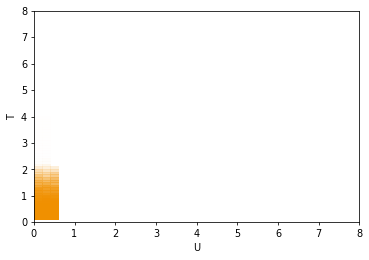

In [149]:
from FKMC.import_funcs import incremental_get_data_funcmap_chain_ext

if 'oTU' not in globals():
    print("Loading incremental data...")
    with open(Path('~/HPC_data/pickled_data/TU_finer_data_DONT_USE.pickle').expanduser(), 'rb') as f:
        # Pickle the 'data' dictionary using the highest protocol available.
        oTU = pickle.load(f)
        oTU.functions = TUfunctions

print("Reading in more data...")
logging.basicConfig()
logger = logging.getLogger()
logger.setLevel(logging.INFO)
incremental_get_data_funcmap_chain_ext(oTU, task_id_range = None)

import shutil

print("Backing up the data...")
shutil.copy(Path('~/HPC_data/pickled_data/TU_finer_data.pickle').expanduser(), Path('~/HPC_data/pickled_data/TU_finer_data.pickle.backup').expanduser())


print("Saving the new data...")
with open(Path('~/HPC_data/pickled_data/TU_finer_data.pickle').expanduser(), 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    oTU.functions = None
    pickle.dump(oTU, f, pickle.HIGHEST_PROTOCOL)
    print('Pickling Successful')
    
f, axes = plt.subplots(1,1, sharey = 'all', gridspec_kw = dict(wspace = 0.1))
TU_phase_diagram(axes, oTU)

In [44]:
oTU.hints.Mf_moments

('Ns', 'Rs', 'Us', 'Ts', 'nth moment')

In [46]:
oTU.flat.DOS

array([[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])

/rds/general/user/tch14/home/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice
  # This is added back by InteractiveShellApp.init_path()
/rds/general/user/tch14/home/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice
  if sys.path[0] == '':
/rds/general/user/tch14/home/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in greater


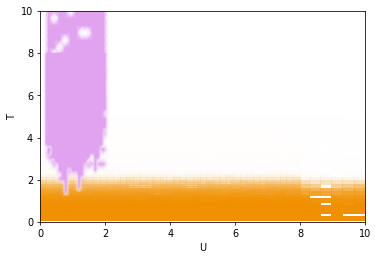

In [151]:
def TU_phase_diagram(ax, TU_data):
    cdw_color = '#f09000'
    gapped_color = '#00afdb'
    gapless_color = '#e1a3f0'
    
    from matplotlib.colors import LinearSegmentedColormap
    
    plot_binder = False
    norm = mpl.colors.Normalize(vmin=0, vmax=1)
    #TU_data.hints.Mf_moments == ('Ns', 'repeats', 'Us', 'Ts', 'moment', 'MCstep')
    M2 = np.nanmean(TU_data.Mf_moments[-1, :, :, :, 2], axis = 0).T
    M4 = np.nanmean(TU_data.Mf_moments[-1, :, :, :, 4], axis = 0).T
    Y = M2**2 / M4 if plot_binder else M2
    
    norm = mpl.colors.Normalize(vmin=0, vmax=1)
    colors = [(1,1,1,0), cdw_color]
    cmap = LinearSegmentedColormap.from_list("mycmap", colors)
    pcol = ax.pcolormesh(TU_data.Us, TU_data.Ts, Y, cmap=cmap, norm = norm, linewidth=0, rasterized = True)
    #pcol.set_edgecolor('face')
    ax.set(ylabel = 'T', xlabel = 'U')
    
    e = 0.01
    ix = (-e < TU_data.E_bins[:-1] ) & (TU_data.E_bins[:-1] < e)
    #                [Ns, Rs, Ts, Us, Es]
    DOS = TU_data.DOS[-1, :, :, :, :].mean(axis = 0)
    percent_low_E_states = DOS[:, :, ix].sum(axis = -1) / DOS.sum(axis = -1)[0, 0]
    
    
    norm = mpl.colors.Normalize(vmin=0, vmax=0.1)
    colors = [(1,1,1,0), gapless_color]
    cmap = LinearSegmentedColormap.from_list("mycmap", colors)
    pcol = ax.pcolormesh(TU_data.Ts, TU_data.Us, percent_low_E_states.T > 0.00001, cmap = cmap, shading = 'gouraud', rasterized = True, linewidth = 0)

 
with open(Path('~/HPC_data/pickled_data/TU_phase_data.pickle').expanduser(), 'rb') as file: 
    TU_data = pickle.load(file)   

f, axes = plt.subplots(1,1, sharey = 'all', gridspec_kw = dict(wspace = 0.1))
TU_phase_diagram(axes, TU_data)
TU_phase_diagram(axes, oTU)

30

T = 3.5999999999999996 U = 0.41025641025641024, N = 250


/rds/general/user/tch14/home/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/rds/general/user/tch14/home/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/rds/general/user/tch14/home/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/rds/general/user/tch14/home/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice
/rds/general/user/tch14/home/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in less
/rds/general/user/tch14/home/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: Mean of empty slice


166.66666666666032
0.0


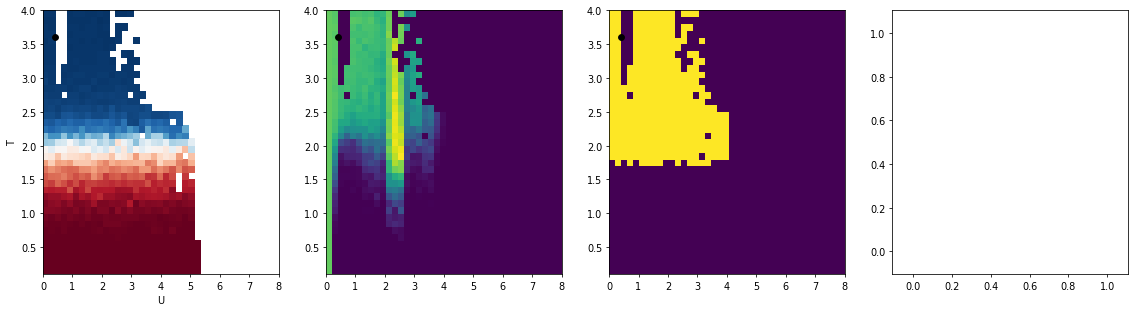

In [134]:
def plot_opening(TU_data, Ti = 45, Ui = 5):
    print(f'T = { TU_data.Ts[Ti]} U = { TU_data.Us[Ui]}, N = {TU_data.Ns[-1]}')
    
    e = 0.1
    ix = (-e < TU_data.E_bins[:-1] ) & (TU_data.E_bins[:-1] < e)

    DOS = np.nanmean(TU_data.DOS[-1, :, :, :, :], axis = 0)
    normalisation = DOS.sum(axis = -1)[0, 0]
    print(normalisation)
    percent_low_E_states = np.nansum(DOS[:, :, ix], axis = -1) / normalisation

    f, ax = plt.subplots(1,4, figsize = (20, 5), gridspec_kw = dict())

    TU_phase_diagram(ax[0], TU_data)
    ax[1].pcolormesh(TU_data.Us, TU_data.Ts, percent_low_E_states.T, linewidth=0, rasterized = True)
    

    ax[0].plot([TU_data.Us[Ui],], [TU_data.Ts[Ti],], marker = 'o', color = 'k')
    ax[1].plot([TU_data.Us[Ui],], [TU_data.Ts[Ti],], marker = 'o', color = 'k')
    ax[2].plot([TU_data.Us[Ui],], [TU_data.Ts[Ti],], marker = 'o', color = 'k')


    M2 = np.nanmean(TU_data.Mf_moments[-1, :, :, :, 2], axis = 0).T
    ax[2].pcolormesh(TU_data.Us, TU_data.Ts, (percent_low_E_states.T > 0) & (M2 < 0.7) , linewidth=0, rasterized = True)

    single = np.nanmean(TU_data.DOS[-1, :, Ui, Ti, :], axis = 0)
    
    ax[3].plot(TU_data.E_bins[:-1], single)
    single[~ix] = np.NaN
    ax[3].plot(TU_data.E_bins[:-1], single)

    print(percent_low_E_states[Ui, Ti])
    
plot_opening(oTU, Ti = 35, Ui = 2)

T = 4.324137931034483 U = 1.7241379310344829, N = 128
128000.0
0.0281796875


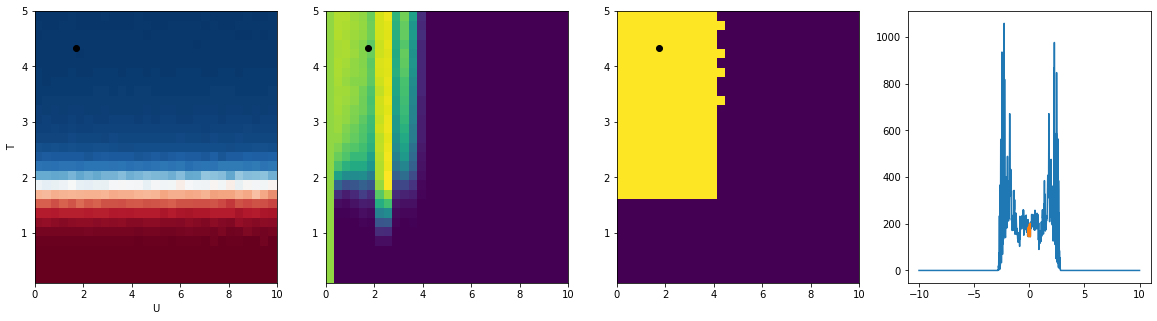

In [97]:
plot_opening(TU_data, Ti = 25, Ui = 5)